# Estandarización


Muchos de los modelos dependen de las medidas de las distancias de las variables en el espacio. Debido a esto es importante que todas las variables estén medidas en **la misma escala**, en los casos que no sea así, es necesario normalizar/estandarizar los datos.

Cuando se cambia una esclaa de un vector, significa que se debe sumar o restar una constante y luego multiplicar o dividir por otra constante. Esta es lamanera en la que se cambia las unidades de medida de los datos (por ejemplo para convertir de Grados Celsius a Fahrenheit)--Fuente: http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html--

Hay distintos métodos para realizar esto, en este caso vamos a utilizar la Estandarización con el método StandarScaler y la Normalización MinMax con el métodos MinMaxScaler de la librería Scikit-Learn

Como ejemplo utilizaremos nuevamente la Regresión con KNN y veremos si cambia el resultado de la performance de los modelos. Utilizaremos el dataset de "insurance" para predecir el costo de un Seguro de Salud de Kaggle. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data_salud = pd.read_csv("insurance.csv")

In [3]:
# Observamos las primeras tres columnas
data_salud.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


**age**: Edad del beneficiario principal 

**sex**: Sexo del contratista: male (hombre) / female (mujer)

**bmi**:  Índice de masa corporal

**children**:Número de hijos cubiertos por el seguro médico

**smoker**: Fumador

**region**: Área residencial del beneficiario en los EE. UU: noreste, sureste, suroeste, noroeste.

**charges**: Costo individual facturado por Seguro Medico

In [4]:
#ver la información (qué tamaño tiene, qué columnas, que tipos de datos, si hay nulos)

data_salud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Si se utiliza get_dummies sobre todo el dataset, las variables numéricas seguiran igual, las variables categóricas las convertirá en dummies
# Automáticamente genera el prefijo con el nombre de la columna
# También es posible utilizar el drop_first


data_salud = pd.get_dummies(data_salud, drop_first=True)

In [6]:
data_salud.head(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,1,0


In [8]:
#Observamos el promedio(mean), el máximo y el mínimo para ver la escala de las variables. 

data_salud.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data_salud["age"].mean()

39.20702541106129

#### Entrenamiento del modelo KNN



In [13]:
#Generamos X e y

X = data_salud.drop(columns = "charges")   #variables predictoras
y = data_salud["charges"]                  #variable a predecir

In [14]:
# Dividimos datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=253)  #por default 25% de test


In [15]:
print("El tamaño de X_train es: ", X_train.shape)
print("El tamaño de X_test es: ",X_test.shape)
print("El tamaño de y_train es: ",y_train.shape)
print("El tamaño de y_test es: ",y_test.shape)

El tamaño de X_train es:  (1003, 8)
El tamaño de X_test es:  (335, 8)
El tamaño de y_train es:  (1003,)
El tamaño de y_test es:  (335,)


In [16]:
# Importamos de la librería Scikit-Learn el modelo que utilizaremos KNN de regresión

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


In [19]:
#Podemos hacer una interación cambiando el hiperparámetro n_neighbors de 2 a 10 para ver los resultados

r2 = []
for k in range(2,10):
    knn_n= KNeighborsRegressor(n_neighbors=k)
    knn_n.fit(X_train, y_train)
    y_pred_n = knn_n.predict(X_test)
    r2_knnn = r2_score(y_test,y_pred_n)
    r2.append(r2_knnn)
    print("el R2 del modelo con ", k, "vecinos más cercanos es ", r2_knnn)



el R2 del modelo con  2 vecinos más cercanos es  0.08288653751333597
el R2 del modelo con  3 vecinos más cercanos es  0.12735796271888689
el R2 del modelo con  4 vecinos más cercanos es  0.18989762383230013
el R2 del modelo con  5 vecinos más cercanos es  0.24665793549933301
el R2 del modelo con  6 vecinos más cercanos es  0.21949908035346022
el R2 del modelo con  7 vecinos más cercanos es  0.20614326994273036
el R2 del modelo con  8 vecinos más cercanos es  0.22545635154146315
el R2 del modelo con  9 vecinos más cercanos es  0.22629329102187734


[0.08288653751333597,
 0.12735796271888689,
 0.18989762383230013,
 0.24665793549933301,
 0.21949908035346022,
 0.20614326994273036,
 0.22545635154146315,
 0.22629329102187734]

### Estandarizamos las variables con distintos métodos

#### Estandarización con StandarScaler

Las variables que estamos utilizando tienen distinta escala por lo que es necesario realizar una estandarización, se utiliza cuando las variables tienen distribución normal. 

Todas las variables deben tener media = 0 y desvío estandar = 1. Lo que se realiza es la generación del z-score restando cada valor a la media y dividiendo por el desvío estandar. 

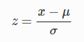

Fuente: https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html

#### Importamos el escalador e instanciamos un modelo

Importamos de la librería de Pre-procesamiento de Scikit-Learn el MinMax Scaler y creamos el objeto que utilizaremos 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### Utilizamos el metodo fit_transform sobre los datos de entrenamiento

En este caso se entrena el modelo Scaler para definir la Media y el Desvío Estandar y luego se utiliza el método *transform* para transformar los datos de entrenamiento de acuerdo a lo definido en el entrenamiento. Se realiza todo con el mismo método: *fit_transform*

In [22]:
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_train_std

array([[ 1.32209434,  0.17251778,  0.78860719, ..., -0.55777335,
        -0.61615125, -0.56852352],
       [-1.50171448,  0.45332199, -0.90150609, ..., -0.55777335,
        -0.61615125, -0.56852352],
       [ 1.74566566,  1.21773346, -0.90150609, ..., -0.55777335,
        -0.61615125, -0.56852352],
       ...,
       [-0.37219095, -0.66414741, -0.05644945, ..., -0.55777335,
         1.62297812, -0.56852352],
       [ 0.96911824,  1.75635207, -0.90150609, ..., -0.55777335,
         1.62297812, -0.56852352],
       [ 0.96911824, -0.31108948, -0.90150609, ...,  1.79284291,
        -0.61615125, -0.56852352]])

#### Utilizamos el metodo transform sobre los datos de testeo

En este caso el modelo ya está entrenado en el paso anterior por lo que solo debe realizarse la transformación con el método *transform*. El entrenamiento se hace solo con los datos de entrenamiento, si se entrenase nuevamente el modelo con los datos de testeo se corre el riesgo de que haya una media y un desvío estandar diferente (son menos cantidad de datos) y que el resultado de la normalización sea equivocado. 

La razón por la que no se entrena el Scaler con todos los datos (entranmiento y testeo) es porque el testeo simula la inclusión de datos nuevos con los que hoy no se cuenta.

In [26]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1029,37,17.290,2,0,0,0,0,0
271,50,34.200,2,1,1,0,0,1
339,46,27.720,1,0,0,0,1,0
478,21,36.850,0,1,0,0,1,0
995,39,23.275,3,0,0,0,0,0


In [24]:
X_test_std = scaler.transform(X_test)
X_test_std

array([[-0.16040529, -2.21431803,  0.78860719, ..., -0.55777335,
        -0.61615125, -0.56852352],
       [ 0.75733258,  0.56252363,  0.78860719, ..., -0.55777335,
        -0.61615125,  1.75894217],
       [ 0.47495169, -0.50157654, -0.05644945, ..., -0.55777335,
         1.62297812, -0.56852352],
       ...,
       [ 0.40435647, -0.48351312,  0.78860719, ..., -0.55777335,
         1.62297812, -0.56852352],
       [-1.28992882,  0.04032632, -0.90150609, ..., -0.55777335,
         1.62297812, -0.56852352],
       [-0.37219095,  0.18811801, -0.05644945, ..., -0.55777335,
        -0.61615125, -0.56852352]])

#### Entrenamos y testeamos nuevamente

Utilizamos la iteración para ver la performance de los modelos con los distintos hiperparametros a fin de poder comparar con los modelos sin normalización.

In [28]:
# Realizamos nuevamente los modelos cambiando el hiperparámetro n_neighbors de 1 a 10 para ver los resultados

r2_estandarizado = []

for k in range(2,10):
    knn_n= KNeighborsRegressor(n_neighbors=k)
    knn_n.fit(X_train_std, y_train)
    y_pred_n = knn_n.predict(X_test_std)
    r2_knnn = r2_score(y_test,y_pred_n)
    r2_estandarizado.append(r2_knnn)
    print("el R2 del modelo con con variables estandarizadas con StandarScaler y k=", k, "vecinos más cercanos es ", r2_knnn)


el R2 del modelo con con variables estandarizadas con StandarScaler y k= 2 vecinos más cercanos es  0.7283996638055471
el R2 del modelo con con variables estandarizadas con StandarScaler y k= 3 vecinos más cercanos es  0.7464050848243624
el R2 del modelo con con variables estandarizadas con StandarScaler y k= 4 vecinos más cercanos es  0.7586038985224107
el R2 del modelo con con variables estandarizadas con StandarScaler y k= 5 vecinos más cercanos es  0.7674530883208732
el R2 del modelo con con variables estandarizadas con StandarScaler y k= 6 vecinos más cercanos es  0.7709167847388706
el R2 del modelo con con variables estandarizadas con StandarScaler y k= 7 vecinos más cercanos es  0.7685891804134949
el R2 del modelo con con variables estandarizadas con StandarScaler y k= 8 vecinos más cercanos es  0.7614211561417339
el R2 del modelo con con variables estandarizadas con StandarScaler y k= 9 vecinos más cercanos es  0.7568429256040061


#### Normalización con MinMaxScaler

Otro ejemplo es la normalización utilizando los valores Máximos y Mínimos que lleva a todos los valores a estar entre 0 y 1. Este tipo de normalización es muy útil pero es sensible a outliers.

En este caso se resta el mínimo y se divide por el máximo menos el mínimo

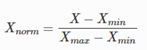


Fuente: https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html

#### Importamos el escalador e instanciamos un modelo

Importamos de la librería de Pre-procesamiento de Scikit-Learn el MinMax Scaler y creamos el objeto que utilizaremos 

In [29]:
# Importamos MinMaxScaler y e instanciamos un modelo

from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

#### Utilizamos el metodo fit_transform sobre los datos de entrenamiento

En este caso se entrena el modelo Scaler para definir los Mínimos y Máximos y luego se utiliza el método *transform* para transformar los datos de entrenamiento de acuerdo a lo definido en el entrenamiento. Se realiza todo con el mismo método: *fit_transform*

In [34]:
X_train_smm = scaler_minmax.fit_transform(X_train)
X_train_smm

array([[0.86956522, 0.41332783, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.46041581, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.58859975, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.34782609, 0.27302767, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.76086957, 0.67892056, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.76086957, 0.33223186, 0.        , ..., 1.        , 0.        ,
        0.        ]])

#### Utilizamos el metodo transform sobre los datos de testeo

En este caso el modelo ya está entrenado en el paso anterior por lo que solo debe realizarse la transformación con el método *transform*. El entrenamiento se hace solo con los datos de entrenamiento, si se entrenase nuevamente el modelo con los datos de testeo se corre el riesgo de que haya un mínimo y un máximo diferente (son menos cantidad de datos) y que el resultado de la normalización sea equivocado. 

La razón por la que no se entrena el Scaler con todos los datos (entranmiento y testeo) es porque el testeo simula la inclusión de datos nuevos con los que hoy no se cuenta.

In [36]:
X_test_smm = scaler.transform(X_test)

#### Entrenamos y testeamos nuevamente

Utilizamos la iteración para ver la performance de los modelos con los distintos hiperparametros a fin de poder comparar con los modelos sin normalización.

In [37]:
# Realizamos nuevamente los modelos cambiando el hiperparámetro n_neighbors de 1 a 10 para ver los resultados

r2_normalizado = []

for k in range(2,10):
    knn_n= KNeighborsRegressor(n_neighbors=k)
    knn_n.fit(X_train_smm, y_train)
    y_pred_n = knn_n.predict(X_test_smm)
    r2_knnn = r2_score(y_test,y_pred_n)
    r2_normalizado.append(r2_knnn)
    print("el R2 del modelo con con variables normalizadas con MinMaxScaler y k=", k, "vecinos más cercanos es ", r2_knnn)



el R2 del modelo con con variables normalizadas con MinMaxScaler y k= 2 vecinos más cercanos es  0.7027282366687507
el R2 del modelo con con variables normalizadas con MinMaxScaler y k= 3 vecinos más cercanos es  0.7102260150343589
el R2 del modelo con con variables normalizadas con MinMaxScaler y k= 4 vecinos más cercanos es  0.7127395801122073
el R2 del modelo con con variables normalizadas con MinMaxScaler y k= 5 vecinos más cercanos es  0.7237499088179009
el R2 del modelo con con variables normalizadas con MinMaxScaler y k= 6 vecinos más cercanos es  0.7348821743481282
el R2 del modelo con con variables normalizadas con MinMaxScaler y k= 7 vecinos más cercanos es  0.7424185656230706
el R2 del modelo con con variables normalizadas con MinMaxScaler y k= 8 vecinos más cercanos es  0.7433565067069643
el R2 del modelo con con variables normalizadas con MinMaxScaler y k= 9 vecinos más cercanos es  0.7428641022973952


In [38]:
# Comparamos la mejor perfomance de los 3 tipos

print("el R2 del modelo que mejor perfoma sin estandarizar es", round(max(r2),2))
print("el R2 del modelo que mejor perfoma con los datos estandarizados con StandarScaler es", round(max(r2_estandarizado),2))
print("el R2 del modelo que mejor perfoma con los datos normalizados con MinMaxScaler es", round(max(r2_normalizado),2))


el R2 del modelo que mejor perfoma sin estandarizar es 0.25
el R2 del modelo que mejor perfoma con los datos estandarizados con StandarScaler es 0.77
el R2 del modelo que mejor perfoma con los datos normalizados con MinMaxScaler es 0.74
